C:\Users\anany\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\anany\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\anany\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\anany\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\anany\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


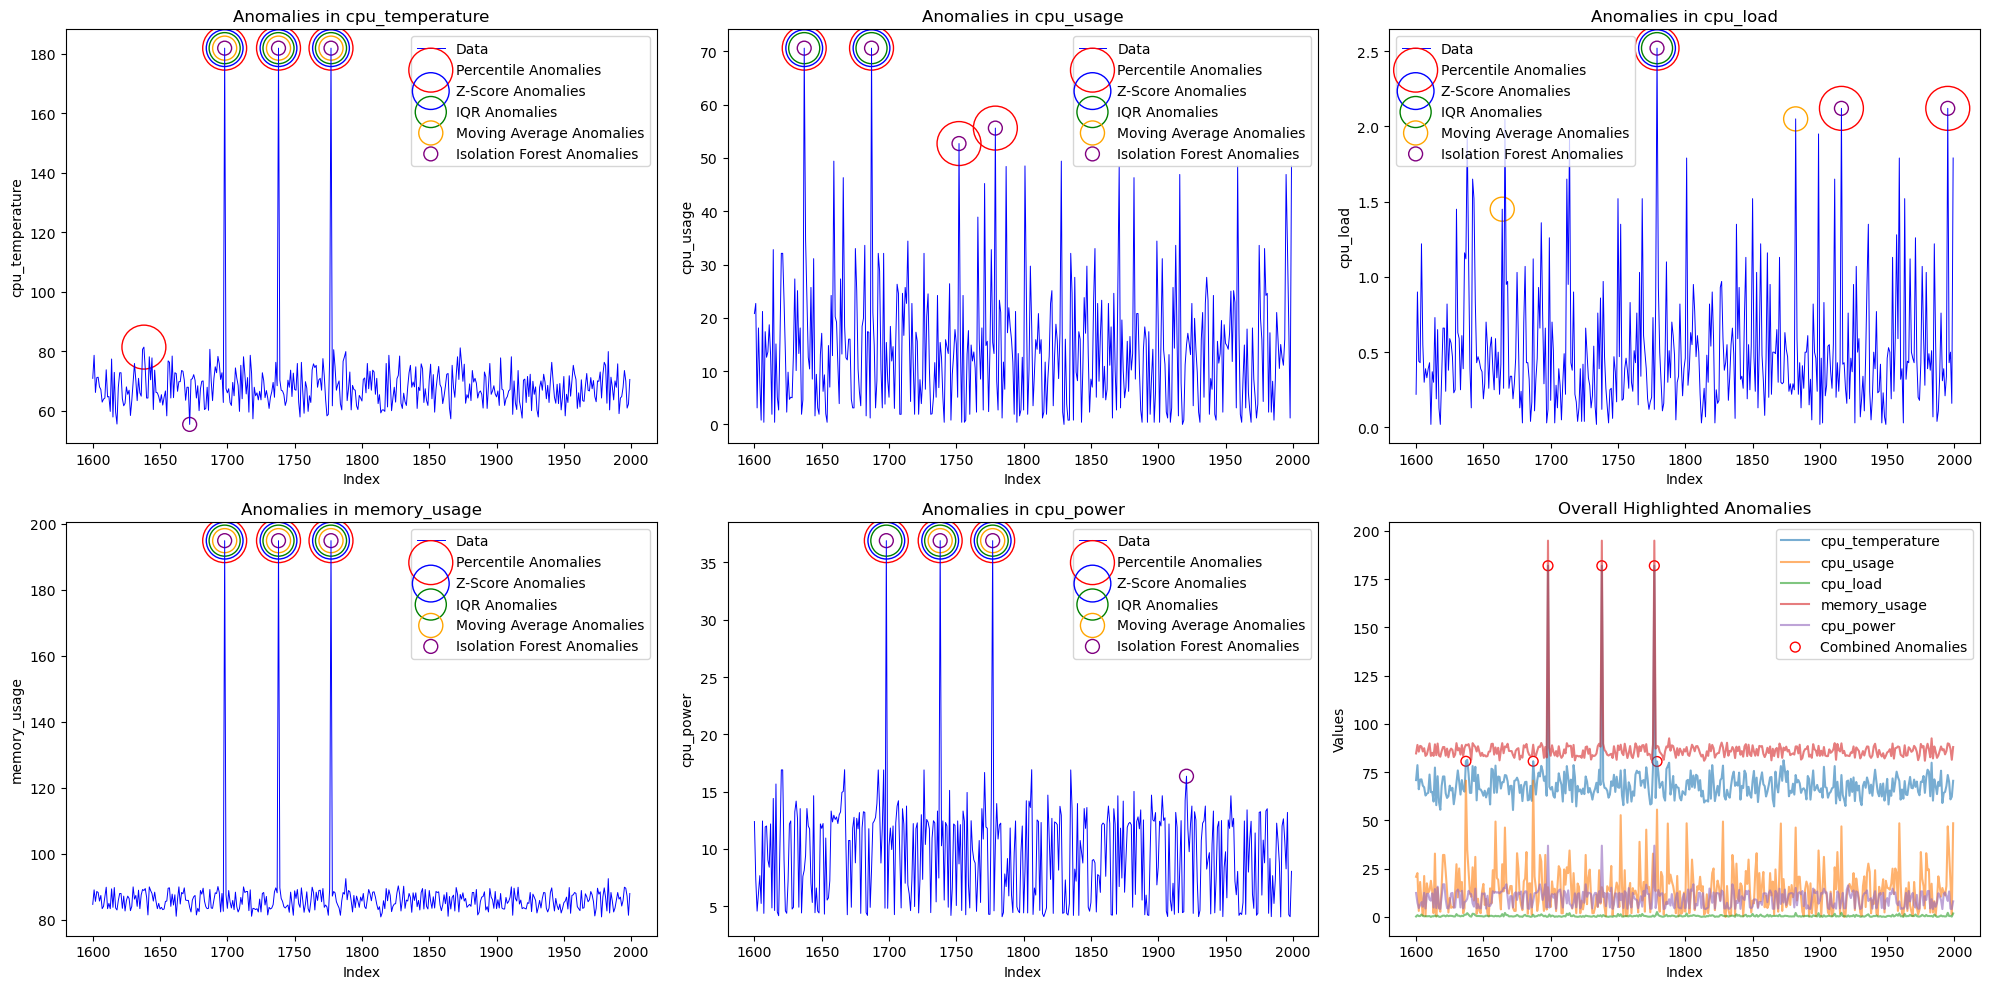

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

def visualize_anomalies(df_anomalies, numeric_columns):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    axs = axs.flatten()  # Flatten to easily iterate over subplots

    methods = ['Percentile', 'Z-Score', 'IQR', 'Moving Average', 'Isolation Forest']
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    markers = ['o', 'o', 'o', 'o', 'o']
    sizes = [1000, 700, 500, 300, 100]

    for i, col in enumerate(numeric_columns):
        if i >= len(axs) - 1:
            break  # Reserve the last subplot for the overall plot
        ax = axs[i]
        ax.plot(df_anomalies.index, df_anomalies[col], label='Data', color='blue', fillstyle='none', linewidth=0.7)

        # Anomaly detection methods
        anomalies_by_method = {}

        # Percentile Method
        lower_percentile = 0
        upper_percentile = 99
        lower_bound = np.percentile(df_anomalies[col], lower_percentile)
        upper_bound = np.percentile(df_anomalies[col], upper_percentile)
        anomalies_by_method['Percentile'] = (df_anomalies[col] < lower_bound) | (df_anomalies[col] > upper_bound)

        # Z-Score Method
        z_threshold = 4
        mean = df_anomalies[col].mean()
        std_dev = df_anomalies[col].std()
        anomalies_by_method['Z-Score'] = np.abs((df_anomalies[col] - mean) / std_dev) > z_threshold

        # IQR Method
        Q1 = df_anomalies[col].quantile(0.0)
        Q3 = df_anomalies[col].quantile(0.85)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        anomalies_by_method['IQR'] = (df_anomalies[col] < lower_bound) | (df_anomalies[col] > upper_bound)

        # Moving Average Method
        window_size = 20
        std_threshold = 3.5
        rolling_mean = df_anomalies[col].rolling(window=window_size).mean()
        rolling_std = df_anomalies[col].rolling(window=window_size).std()
        anomalies_by_method['Moving Average'] = (df_anomalies[col] < rolling_mean - std_threshold * rolling_std) | \
                                                (df_anomalies[col] > rolling_mean + std_threshold * rolling_std)

        # Isolation Forest Method
        isolation_forest = IsolationForest(contamination=0.01, random_state=0)
        isolation_forest.fit(df_anomalies[[col]])
        anomalies_by_method['Isolation Forest'] = isolation_forest.predict(df_anomalies[[col]]) == -1

        # Plot anomalies for each method
        for j, method in enumerate(methods):
            anomalies = anomalies_by_method[method]
            ax.scatter(df_anomalies.index[anomalies], df_anomalies.loc[anomalies, col],
                       label=f'{method} Anomalies', color=colors[j],facecolors='none', marker=markers[j], s=sizes[j])

        ax.set_title(f'Anomalies in {col}')
        ax.set_xlabel('Index')
        ax.set_ylabel(col)
        ax.legend()

    # Overall Anomalies (6th subplot)
    overall_ax = axs[-1]
    overall_ax.plot(df_anomalies.index, df_anomalies[numeric_columns], label=numeric_columns, alpha=0.6)

    # Combined anomaly detection
    combined_anomalies = np.zeros(df_anomalies.shape[0], dtype=bool)

    for col in numeric_columns:
        # Z-Score Method
        z_threshold = 4
        mean = df_anomalies[col].mean()
        std_dev = df_anomalies[col].std()
        z_anomalies = np.abs((df_anomalies[col] - mean) / std_dev) > z_threshold
        combined_anomalies |= z_anomalies

    overall_ax.scatter(df_anomalies.index[combined_anomalies], df_anomalies.loc[combined_anomalies, numeric_columns[0]],
                       color='red',facecolors='none', label='Combined Anomalies', s=50)

    overall_ax.set_title('Overall Highlighted Anomalies')
    overall_ax.set_xlabel('Index')
    overall_ax.set_ylabel('Values')
    overall_ax.legend()

    plt.tight_layout()
    plt.savefig("combined_anomalies_with_overall.png")
    plt.show()

# Load dataset
file_path = 'C:/Users/anany/Downloads/dataset2 (1).csv'
df = pd.read_csv(file_path)

# Ensure all columns used for anomaly detection are numeric
numeric_columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
numeric_columns = [col for col in numeric_columns if col in df.columns]

if not numeric_columns:
    raise ValueError("None of the specified numeric columns are found in the dataset.")

# Convert columns to numeric
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df = df.dropna(subset=numeric_columns)

# Focused subset for visualization
df_anomalies = df.copy()[1600:2000]

# Visualize anomalies
visualize_anomalies(df_anomalies, numeric_columns)

